In [1]:
using Cubature

In [2]:
function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function Z(n, m, ρ, θ)
    if m < 0
        R(n, abs(m), ρ) * sin(abs(m) * θ)
    else
        R(n, m, ρ) * cos(m * θ)
    end
end

Z (generic function with 1 method)

In [41]:
σ1 = .1
σ2 = 1
function integrand(n, m)
    function rtn(coor)
        ρ = coor[1]
        θ = coor[2]
        x = ρ * cos(θ)
        y = ρ * sin(θ)
        Z(n, m, ρ, θ) * exp(-x^2/σ1^2 - y^2/σ2^2) * ρ
    end
    rtn
end

integrand (generic function with 1 method)

In [51]:
function neumann(m)
    if m == 0
        2
    else 
        1
    end
end

neumann (generic function with 1 method)

In [52]:
maxn=40
coeffs = [[(2*n+2)/(π*neumann(m)) * hcubature(integrand(n, m), [0., 0.], [1., 2*π], maxevals=10000)[1] for m in range(-n, n, step=1)] for n in range(0, maxn, step=1)];

In [53]:
coeffs

41-element Array{Array{Float64,1},1}:
 [0.08416513712460388]
 [-5.812801752354391e-12, 0.0, 8.446218382845295e-18]
 [2.4090993406349023e-17, 0.0, -0.12232377196674751, 0.0, -0.12513443397448154]
 [7.288630131931291e-11, 0.0, -3.456277739851074e-11, 0.0, 8.92870151361642e-18, 0.0, -4.296863879493244e-17]
 [-6.630362333696331e-17, 0.0, 1.2089714212784161e-17, 0.0, 0.11279824667521597, 0.0, 0.17749362165119562, 0.0, 0.10585030979582677]
 [-5.165890173828077e-11, 0.0, 2.2767501563513156e-10, 0.0, 1.7047711884166252e-10, 0.0, -1.0819269668389892e-17, 0.0, -4.982558399916398e-19, 0.0, 8.999665224160683e-17]
 [1.1054432404679974e-14, 0.0, 1.0983008420866855e-17, 0.0, -2.6362263534103128e-17, 0.0, -0.10295362836940096, 0.0, -0.18556384764997452, 0.0, -0.14081092632777334, 0.0, -0.09275378905598661]
 [4.507785683902507e-12, 0.0, 4.407130233343342e-10, 0.0, -3.6648001123739338e-9, 0.0, -4.40218439149042e-10, 0.0, 2.971782872007135e-11, 0.0, 1.7549228554770478e-17, 0.0, -7.195679655357582e-13, 0.

In [54]:
coeffs_first = [sum([c[1]^2 for c in coeff]) for coeff in coeffs]

41-element Array{Float64,1}:
 0.007083770307203375
 3.378866421224562e-23
 0.030621731754286723
 6.506998501510606e-21
 0.055431718263733144
 8.35670029218253e-20
 0.07346437350661575
 1.3819684094752316e-17
 0.08301498362881335
 2.122125139632298e-14
 0.0845671127839931
 3.1372699871983693e-18
 0.07953587581926487
 ⋮
 1.8013235383992473e-8
 0.003798547273950152
 1.8253684709588175e-12
 0.0021415612664934733
 7.44131874460616e-7
 0.0011701887238071494
 7.187654068531732e-13
 0.000608454416122823
 2.056408960391212e-12
 0.0003039362972068776
 2.848641552360505e-10
 0.0001626866048190029

In [55]:
for i=1:size(coeffs_first, 1)
    println(coeffs_first[i])
end
    

0.007083770307203375
3.378866421224562e-23
0.030621731754286723
6.506998501510606e-21
0.055431718263733144
8.35670029218253e-20
0.07346437350661575
1.3819684094752316e-17
0.08301498362881335
2.122125139632298e-14
0.0845671127839931
3.1372699871983693e-18
0.07953587581926487
4.841675084215956e-16
0.0699255438625809
2.3714083036781324e-16
0.05790133386130806
5.762860584548169e-16
0.045364661848252316
4.176036827493148e-15
0.0337546008697008
4.0787851535971143e-13
0.023905706985155106
1.0204568558943154e-12
0.016145286077055707
4.158680174051386e-14
0.01041801135644327
1.3970030021525503e-12
0.006426716367973261
1.8013235383992473e-8
0.003798547273950152
1.8253684709588175e-12
0.0021415612664934733
7.44131874460616e-7
0.0011701887238071494
7.187654068531732e-13
0.000608454416122823
2.056408960391212e-12
0.0003039362972068776
2.848641552360505e-10
0.0001626866048190029


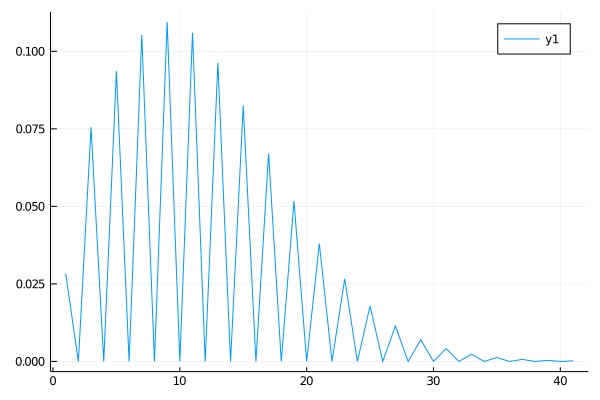

In [46]:
using Plots
plot(coeffs_first)